<a href="https://colab.research.google.com/github/sadrireza/Neural-Networks/blob/main/Basic_Concepts_in_Tensorflow_%26_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras Datasets

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

## Tensorflow Datasets

In [ ]:
!pip install tensorflow -datasets


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -d


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech10

In [ ]:
ds = tfds.load('mnist', split=['train', 'test'])

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
len (ds)

2

In [ ]:
type (ds)

list

In [ ]:
isinstance (ds[1], tf.data.Dataset)

True

In [ ]:
print (train_labels.size)
print (train_labels.shape)
print (train_labels.ndim)
print (train_images.ndim)
print (train_images.size)
print (train_images.shape)
print (train_images.dtype)
print (train_labels.dtype)

60000
(60000,)
1
3
47040000
(60000, 28, 28)
uint8
uint8


In [ ]:
train_images_vector = train_images.reshape (60000 , 784)
# print(train_images_vector.shape)
train_images_vector.shape

(60000, 784)

In [ ]:
train_images_vector = train_images.astype('float32')
train_images_vector.dtype

dtype('float32')

In [ ]:
sample=ds[0].take(1)
for item in sample:
  print (type (item))
  print (item.keys())
  print(type(item.keys()))
  print (type (item ['image']))
  print (type(item ['label']))
  print (item['image'].shape) #showing the eagertensor shape
  print (item['label']) #showing the eagertensor
  print(len(ds[0]))

<class 'dict'>
dict_keys(['image', 'label'])
<class 'dict_keys'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(28, 28, 1)
tf.Tensor(4, shape=(), dtype=int64)
60000


In [ ]:
print (len(ds[0]))
print(len(ds[1]))
print(ds[1].element_spec)

60000
10000
{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}


## Changing Tensorflow to Numpy

In [ ]:
type(item['image'].numpy())

numpy.ndarray

In [ ]:
type(tfds.as_numpy(item['image']))

numpy.ndarray

## In Case of Changing the Variable before the Loop:

In [ ]:
#for item in tdfs.as_numpy(sample)
#print(type(item['image']))
#...

##Visualization for Keras using Matplotlib

In [ ]:
import matplotlib.pyplot as plt

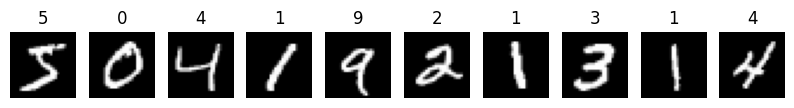

In [ ]:
fig , axes = plt.subplots(1,10,figsize=(10,5))
for i in range (len(axes)):
  axes[i].imshow(train_images[i],cmap='gray')
  axes[i].set_title(train_labels[i])
  axes[i].set_axis_off()

##Visualization for Tensorflow Datasets

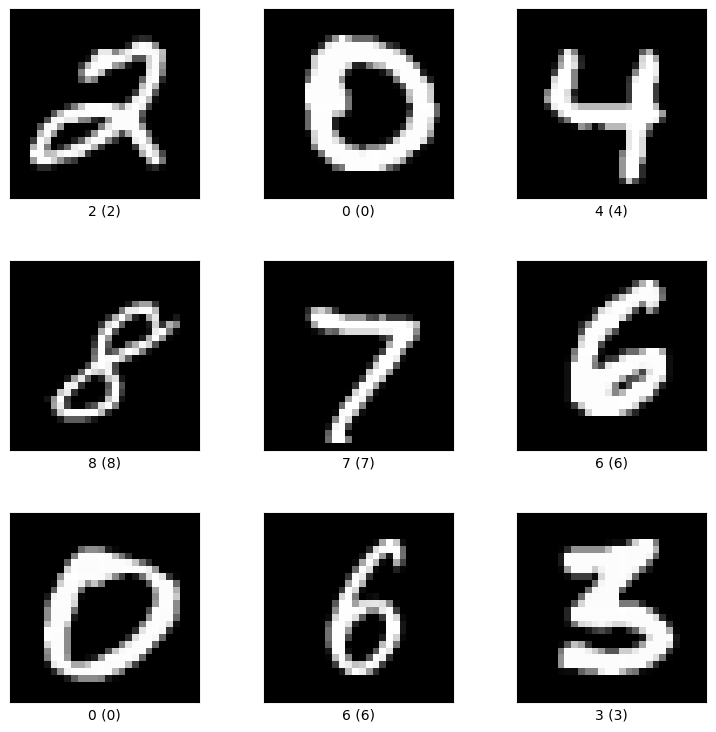

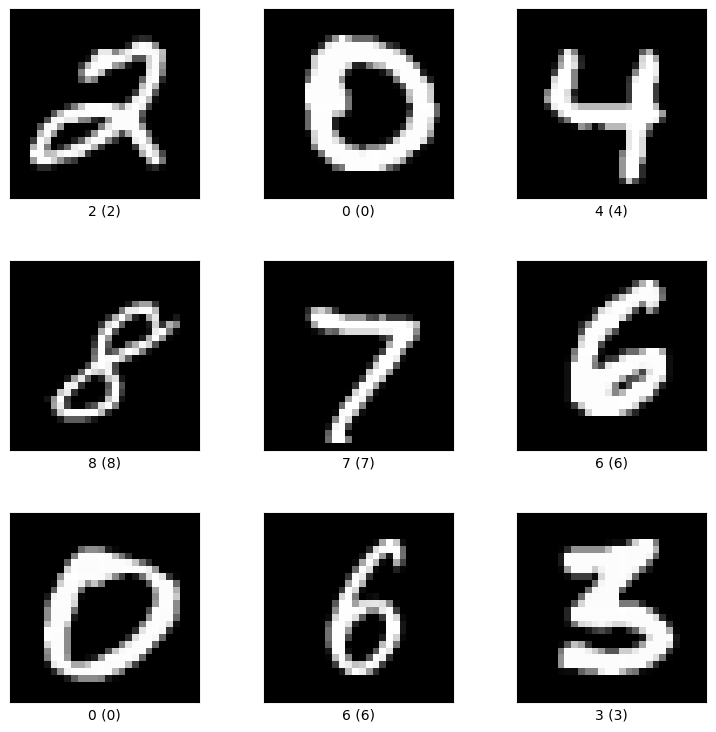

In [ ]:
#tfds.show_examples(ds[0])
#since we get error, we need more parameters while loading tensorflow datasets
ds,info=tfds.load('mnist',split=['train','test'],with_info=True)

#Show
tfds.show_examples(ds[1],info)

In [ ]:
#Changing the type of vars in TF from dict to tuple so that we can use them for training
ds1,info1=tfds.load('mnist',split=['train','test'],with_info=True, as_supervised=True)

#Displaying a sample
sample1=ds1[0].take(1)
for item in sample1:
  print(type(item))

<class 'tuple'>


In [ ]:
print(len(item))

2


In [ ]:
for image, label in sample1:
  print(image.shape)
  print(label)

(28, 28, 1)
tf.Tensor(4, shape=(), dtype=int64)
